# Project 2: Digit Classification Naive Bayes

**Solution**

# Intro
---
In this project, you'll continue working on your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more.
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b>


## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

## Additional Reading and notes
---
If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:
import sklearn
sklearn.__version__

'1.2.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.iloc[shuffle], Y.iloc[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Applying a smoothing using numpy.
---

A common image processing technique is to smooth an image by **blurring**. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

1. Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.
1. Choose some weights as a starting point. Produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
  1. Do not use the filter
  1. Filter the training data but not the dev data
  1. Filter the dev data but not the training data
  1. Filter both training data and dev data
1. Show the accuracies of the four models evaluated as described. What do you see? Can you explain why this is?
1. Experiment with weights that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* A good trick to simplify your code is to use numpy's pad function to add 0s around your original array so you don't have to deal with "edge cases".
* In addition, you can use numpy to multiply and sum slices of two arrays.
* [This notebook](https://colab.research.google.com/drive/1eJXTQLtREXQjQIsLOA9uCrBl6B049-pO) might help shows some example numpy code.
* In general, [numpy operations will be much faster than for loops](https://colab.research.google.com/drive/1KJI4JtuIqVdyZHTTe_mAlKYA5XdLFp3_).
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but in this question, please implement your own.

In [5]:
def blur(data):
  blurred_data = []
  w = 0.5  # this weighting results in best dev accuracy for filter train & dev
  for i in range(data.shape[0]):
      grid = data[i].reshape(28, 28)
      f = np.zeros((28, 28))
      for i in range(28):
          for j in range(28):
              f[i,j] = grid[i,j] + np.sum(grid[i-1:i+2, j-1:j+2]) / w
      blurred_data.append(f.flatten())
  return blurred_data

def Q1():

    ### STUDENT START ###

    # Define the blur function
    def blur(data):
        blurred_data = []
        w = 0.5  # this weighting results in best dev accuracy for filter train & dev
        for idx in range(data.shape[0]):
            grid = data.iloc[idx].values.reshape(28, 28)
            padded_grid = np.pad(grid, pad_width=1, mode='constant', constant_values=0)
            f = np.zeros((28, 28))
            for i in range(1, 29):
                for j in range(1, 29):
                    f[i-1, j-1] = np.sum(padded_grid[i-1:i+2, j-1:j+2]) * w
            blurred_data.append(f.flatten())
        return np.array(blurred_data)

    # Train and evaluate the 1-NN model
    def evaluate_knn(train_data, train_labels, dev_data, dev_labels):
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_data, train_labels)
        predictions = knn.predict(dev_data)
        correct_predictions = (predictions == dev_labels).sum()
        accuracy = correct_predictions / len(dev_labels)
        return accuracy

    # Apply the filter in four different ways
    # 1. Do not use the filter
    accuracy_no_filter = evaluate_knn(mini_train_data, mini_train_labels, dev_data, dev_labels)

    # 2. Filter the training data but not the dev data
    blurred_mini_train_data = blur(mini_train_data)
    accuracy_filter_train = evaluate_knn(blurred_mini_train_data, mini_train_labels, dev_data, dev_labels)

    # 3. Filter the dev data but not the training data
    blurred_dev_data = blur(dev_data)
    accuracy_filter_dev = evaluate_knn(mini_train_data, mini_train_labels, blurred_dev_data, dev_labels)

    # 4. Filter both training data and dev data
    blurred_mini_train_data = blur(mini_train_data)
    blurred_dev_data = blur(dev_data)
    accuracy_filter_both = evaluate_knn(blurred_mini_train_data, mini_train_labels, blurred_dev_data, dev_labels)

    # Display the accuracies
    print(f"Accuracy without filter: {accuracy_no_filter}")
    print(f"Accuracy with filtered training data: {accuracy_filter_train}")
    print(f"Accuracy with filtered dev data: {accuracy_filter_dev}")
    print(f"Accuracy with filtered training and dev data: {accuracy_filter_both}")

    ### STUDENT END ###

Q1()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy without filter: 0.884
Accuracy with filtered training data: 0.268
Accuracy with filtered dev data: 0.75
Accuracy with filtered training and dev data: 0.905


### Question 2: Modeling your data and experimenting with different Naive Bayes models.
---

1. Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.
  1. For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.
  1. For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Here you'll likely need to implement a `trianarize` helper function. Since we are going beyond the binary representation of our features, you should use `MultinomialNB` to produce the model.
1. Show the Bernoulli model accuracy and the Multinomial model accuracy.
1. Does the multinomial version improve the results? Why or why not?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.



In [6]:
# Solution with binarization by explicit binarize function

def Q2():

    ### STUDENT START ###

    # Function to binarize the data
    def binarize(data, threshold):
        return (data > threshold).astype(int)

    # Function to trianarize the data
    def trianarize(data, low_threshold, high_threshold):
        result = np.zeros_like(data)
        result[data > low_threshold] = 1
        result[data > high_threshold] = 2
        return result

    # Binarize the data with a threshold of 0.1
    binarized_mini_train_data = binarize(mini_train_data, 0.1)
    binarized_dev_data = binarize(dev_data, 0.1)

    # Train and evaluate the Bernoulli Naive Bayes model
    bernoulli_nb = BernoulliNB(binarize=0.0)  # binarize=0.0 because we already binarized the data
    bernoulli_nb.fit(binarized_mini_train_data, mini_train_labels)
    bernoulli_predictions = bernoulli_nb.predict(binarized_dev_data)
    bernoulli_accuracy = (bernoulli_predictions == dev_labels).mean()
    print(f"BernoulliNB accuracy: {bernoulli_accuracy}")

    # Trianarize the data with thresholds of 0.1 and 0.9
    trianarized_mini_train_data = trianarize(mini_train_data, 0.1, 0.9)
    trianarized_dev_data = trianarize(dev_data, 0.1, 0.9)

    # Train and evaluate the Multinomial Naive Bayes model
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(trianarized_mini_train_data, mini_train_labels)
    multinomial_predictions = multinomial_nb.predict(trianarized_dev_data)
    multinomial_accuracy = (multinomial_predictions == dev_labels).mean()
    print(f"MultinomialNB accuracy: {multinomial_accuracy}")

    # Comparison
    if multinomial_accuracy > bernoulli_accuracy:
        print("The Multinomial Naive Bayes model performs better.")
    else:
        print("The Bernoulli Naive Bayes model performs better or they perform equally as well.")

    ### STUDENT END ###

Q2()

BernoulliNB accuracy: 0.814
MultinomialNB accuracy: 0.807
The Bernoulli Naive Bayes model performs better or they are equal.


ANSWER:
- BernoulliNB accuracy: 0.814
- MultinomialNB accuracy: 0.807
- The Bernoulli Naive Bayes model performs better or they perform equally as well. This is possibly because the added complexity of representing features in three states (white, gray, black) does not provide a significant advantage for this particular dataset and problem. As a result, the simpler binary feature representation used by BernoulliNB may be more effective.

### Question 3: Applying the grid search technique.
1. Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.
1. What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation.
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.



In [7]:
def Q3(alphas):

    ### STUDENT START ###

    # Define the BernoulliNB model with binarization threshold set to 0
    bernoulli_nb = BernoulliNB(binarize=0.0)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(bernoulli_nb, param_grid=alphas, cv=5, scoring='accuracy')
    grid_search.fit(mini_train_data, mini_train_labels)

    # Display the results
    for alpha, mean_score in zip(grid_search.cv_results_['param_alpha'], grid_search.cv_results_['mean_test_score']):
        print(f"Alpha: {alpha}, Accuracy: {mean_score}")

    # Best alpha and corresponding accuracy
    best_alpha = grid_search.best_params_['alpha']
    best_accuracy = grid_search.best_score_
    print(f"Best alpha: {best_alpha}, Best accuracy: {best_accuracy}")

    ### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
Q3(alphas)

Alpha: 1e-10, Accuracy: 0.8139999999999998
Alpha: 0.0001, Accuracy: 0.819
Alpha: 0.001, Accuracy: 0.825
Alpha: 0.01, Accuracy: 0.8219999999999998
Alpha: 0.1, Accuracy: 0.818
Alpha: 0.5, Accuracy: 0.8130000000000001
Alpha: 1.0, Accuracy: 0.8089999999999999
Alpha: 2.0, Accuracy: 0.8049999999999999
Alpha: 10.0, Accuracy: 0.783
Best alpha: 0.001, Best accuracy: 0.825


ANSWER:

- The accuracy decreases slightly when alpha is set to an extremely small value (1.0e-10), and it is slightly lower than the best accuracy obtained at alpha = 0.001.
- This is expected because very small alpha values (near 0) result in less smoothing, which can lead to overfitting on the training data. Small alpha values do not adequately handle zero probabilities in the likelihood estimation, which is why the accuracy is not at its peak at these values.

### Question 4: Experimenting with Gaussian Naive Bayes
---
1. Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well.
1. Diagnose and explain the problem.
1. Apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model.
1. Show the model accuracy before your fix and the model accuracy after your fix.  
1. Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Take a look at var_smoothing argument for GaussianNB.
* Feel free to  examine theta and sigma to better understand what's happening. In general though, **it is not a good idea to mess with internal variables of the model**. These are stored in the model's `theta_` and `sigma_` attributes.

In [8]:
def Q4():

    ### STUDENT START ###

    # Train and evaluate the GaussianNB model
    def evaluate_gnb(var_smoothing):
        # GaussianNB model with var_smoothing parameter
        gnb = GaussianNB(var_smoothing=var_smoothing)
        gnb.fit(mini_train_data, mini_train_labels)
        predictions = gnb.predict(dev_data)

        # Calculate accuracy
        correct_count = np.sum(predictions == dev_labels)
        total_count = len(dev_labels)
        accuracy = correct_count / total_count

        return accuracy

    # Evaluate without any fix
    accuracy_before_fix = evaluate_gnb(var_smoothing=1e-9)
    print(f"Accuracy before fix: {accuracy_before_fix}")

    # Evaluate with var_smoothing fix
    accuracy_after_fix = evaluate_gnb(var_smoothing=1e-2)
    print(f"Accuracy after fix: {accuracy_after_fix}")

    ### STUDENT END ###

Q4()

Accuracy before fix: 0.593
Accuracy after fix: 0.797


ANSWER:
- The code above aims to ensure that the Gaussian Naive Bayes model performs comparably to the Bernoulli Naive Bayes model by addressing the variance issue through the var_smoothing parameter.

### Question 5: Naive Bayes as a generative model
---
Because Naive Bayes produces a generative model, you can use it to generate digit images.

1. Produce a Bernoulli Naive Bayes model and then use it to generate a 10x10 grid with 10 example images of each digit. Each pixel output will be either 0 or 1: randomly generating a number and then comparing it to the estimated probability of the pixel being either 0 or 1.  Show the grid.
1. How do the generated digit images compare to the training digit images?

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.



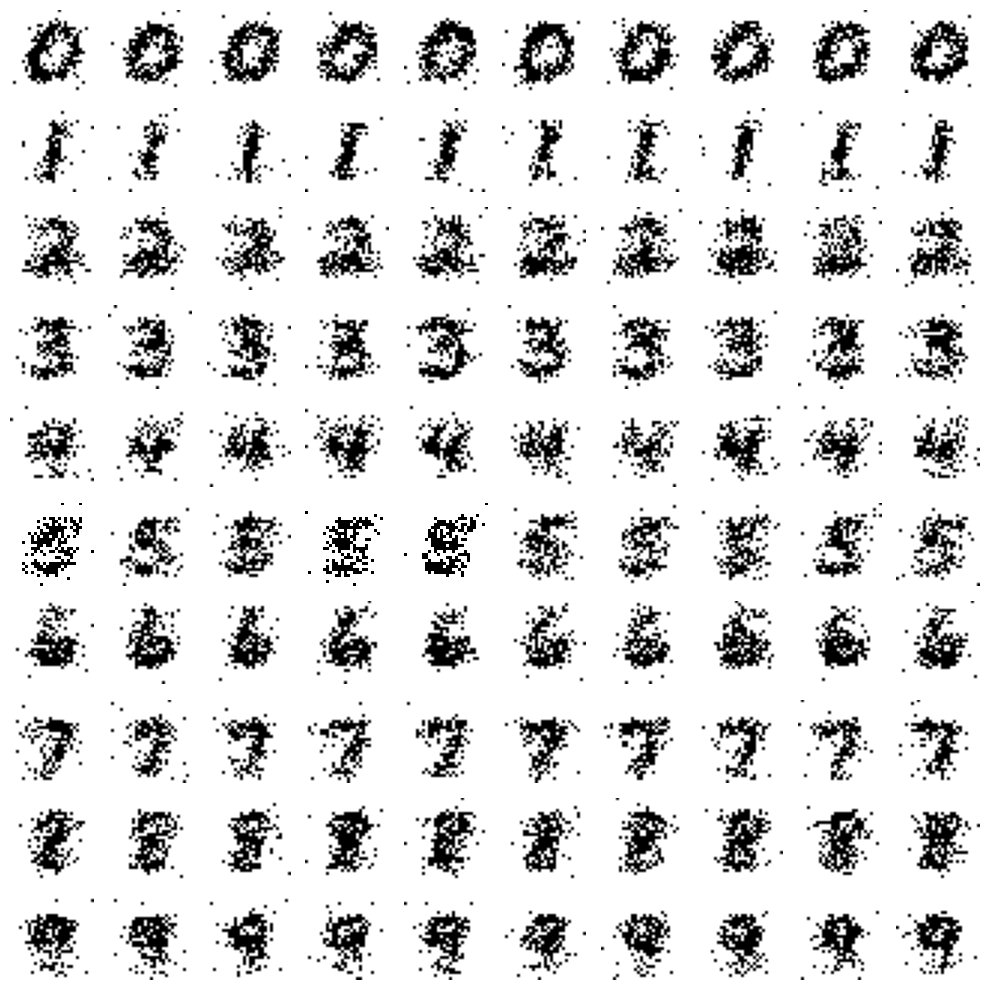

In [9]:
def Q5(num_examples):

    ### STUDENT START ###

    # Train the BernoulliNB model
    bernoulli_nb = BernoulliNB()
    bernoulli_nb.fit(mini_train_data, mini_train_labels)

    # Function to generate digit images
    def generate_digit_images(model, digit, num_examples):
        # Get the log probabilities for the digit
        digit_index = int(digit)
        log_probabilities = model.feature_log_prob_[digit_index]
        probabilities = np.exp(log_probabilities)

        # Generate num_examples images
        generated_images = []
        for _ in range(num_examples):
            random_image = np.random.rand(784) > probabilities
            generated_images.append(random_image.reshape(28, 28))
        return generated_images

    # Generate 10 images for each digit (0-9)
    generated_digits = {digit: generate_digit_images(bernoulli_nb, digit, num_examples) for digit in range(10)}

    # Plot the 10x10 grid
    fig, axes = plt.subplots(10, num_examples, figsize=(10, 10))
    for i in range(10):
        for j in range(num_examples):
            axes[i, j].imshow(generated_digits[i][j], cmap='gray')
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

    ### STUDENT END ###

Q5(10)

ANSWER:
- The generated digit images appear more pixelated.

### Question 6: Model Calibration

---
Recall that:
 * a **strongly calibrated** classifier is rougly 90% accurate when it says it is 90% accurate. The model's estimated posterior probability of the predicted class is indeed 0.9.
 * A **weakly calibrated** classifier is more accurate when it "says" it is more accurate. The actual accuracy is higher when the model's estimated posterior probability is higher.
 * A **poorly calibrated** classifier has no positive correlation between the model's estimate posterior probability and the actual accuracy.

1. Produce a Bernoulli Naive Bayes model.  
1. Evaluate performance:
  1. Partition the dev set into several buckets based on the estimated posterior probabilities of the predicted classes (predict_proba)
    - Think of it as a bin in a histogram, where each bin groups a range of estimated posterior probabilities of the predicted classes (predict_proba).
    - Then estimate the actual accuracy the classifier achieved for each bucket.
    - So, for each prediction:
       - Find the bucket whose range includes the estimated posterior probability,
       - and update "correct" and "total" counters accordingly.
       - Show the accuracy for each bucket.
1. How would you characterize the calibration for this Bernoulli Naive Bayes model according to the definitions above?

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.



In [10]:
def Q6(buckets, correct, total):

  ### STUDENT START ###

    # Train the BernoulliNB model with the optimal alpha value
    alpha = 0.001
    bernoulli_nb = BernoulliNB(alpha=alpha, binarize=0)
    bernoulli_nb.fit(mini_train_data, mini_train_labels)

    # Get the predicted probabilities and the predicted classes for the dev set
    predicted_probabilities = bernoulli_nb.predict_proba(dev_data)
    predicted_classes = bernoulli_nb.predict(dev_data)

    # Convert labels to integers
    dev_labels_int = dev_labels.astype(int)
    predicted_classes_int = predicted_classes.astype(int)

    # Partition the dev set into buckets based on the estimated posterior probabilities
    for prob, true_label, predicted_label in zip(predicted_probabilities, dev_labels_int, predicted_classes_int):
        # The predicted probability of the predicted class
        predicted_prob = prob[predicted_label]

        # Find the appropriate bucket
        for i, bucket in enumerate(buckets):
            if predicted_prob <= bucket:
                if true_label == predicted_label:
                    correct[i] += 1
                total[i] += 1
                break

    # Calculate and display the accuracy for each bucket
    for i, bucket in enumerate(buckets):
        if total[i] > 0:
            accuracy = correct[i] / total[i]
        else:
            accuracy = 0.0
        print(f"Bucket {bucket}: Accuracy = {accuracy}")

    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

Q6(buckets, correct, total)

Bucket 0.5: Accuracy = 0.0
Bucket 0.9: Accuracy = 0.3548387096774194
Bucket 0.999: Accuracy = 0.43283582089552236
Bucket 0.99999: Accuracy = 0.4576271186440678
Bucket 0.9999999: Accuracy = 0.6521739130434783
Bucket 0.999999999: Accuracy = 0.7741935483870968
Bucket 0.99999999999: Accuracy = 0.7878787878787878
Bucket 0.9999999999999: Accuracy = 0.7906976744186046
Bucket 1.0: Accuracy = 0.9377845220030349


ANSWER:
- The observed trend shows that actual accuracy increases with higher predicted probabilities. This positive correlation indicates that the Bernoulli Naive Bayes model is weakly calibrated.

### Question 7 EXTRA CREDIT: Feature generation
---
1. Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.
1. Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

**Note that improving results is actually hard.**

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try implementing [*maxpool*](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) features, taking a rolling maximum over sub-regions of a the image.
- In any case, you can either transform the original data or add new "features" to it.

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [16]:
def Q7():

  ### STUDENT START ###

    # Define a function to generate new features
    def generate_new_features(data):
        new_data = []
        for image in data:
#            try:
                # Convert non-numerical data to numpy arrays and reshape into a 28x28 grid
                if isinstance(image, str):
                    image = np.array(list(map(int, image.split(',')))).reshape(28, 28)
                # Sum pixel values in each row
                row_sums = np.sum(image, axis=1)
                # Average pixel values in each column
                col_averages = np.mean(image, axis=0)
                # Sum pixel values in each square block (block size: 7x7)
                block_sums = []
                for i in range(0, 28, 7):
                    for j in range(0, 28, 7):
                        block_sum = np.sum(image[i:i+7, j:j+7])
                        block_sums.append(block_sum)
                # Maxpool features (rolling maximum over sub-regions of the image)
                maxpool_features = []
                for i in range(0, 28, 2):
                    for j in range(0, 28, 2):
                        maxpool_feature = np.max(image[i:i+2, j:j+2])
                        maxpool_features.append(maxpool_feature)
                # Combine all new features
                new_features = np.concatenate([row_sums, col_averages, block_sums, maxpool_features])
                new_data.append(new_features)
#            except:
#                # Handle reshape errors or other exceptions
#                continue
        return np.array(new_data)

    # Generate new features for mini train data and dev data
#    print(mini_train_data.values)
    new_mini_train_data = generate_new_features(mini_train_data.values)
    new_dev_data = generate_new_features(dev_data)

    # Train the Bernoulli Naive Bayes model with original features
    bernoulli_nb_original = BernoulliNB(alpha=0.1, binarize=0)
    bernoulli_nb_original.fit(mini_train_data, mini_train_labels)
    original_accuracy = bernoulli_nb_original.score(dev_data, dev_labels)
    print("Accuracy with original features:", original_accuracy)

    # Train the Bernoulli Naive Bayes model with new features
    bernoulli_nb_new = BernoulliNB(alpha=0.1, binarize=0)
    print(new_mini_train_data)
    bernoulli_nb_new.fit(new_mini_train_data, mini_train_labels)
    new_accuracy = bernoulli_nb_new.score(new_dev_data, dev_labels)
    print("Accuracy with new features:", new_accuracy)

  ### STUDENT END ###

Q7()

AxisError: axis 1 is out of bounds for array of dimension 1

In [23]:
row_sums = np.array([img.sum(axis=1) for img in mini_train_data.values.reshape(-1,28,28)])
col_sums = np.array([img.sum(axis=0) for img in mini_train_data.values.reshape(-1,28,28)])

row_avgs = np.array([img.mean(axis=1) for img in mini_train_data.values.reshape(-1,28,28)])
col_avgs = np.array([img.mean(axis=0) for img in mini_train_data.values.reshape(-1,28,28)])

(1000, 28)

In [27]:
block_sum = mini_train_data.values.reshape(-1,28,28)[0].reshape(-1,7,7).sum(axis=(1,2))

array([ 0.        ,  0.        ,  3.61960784, 15.53333333, 11.92941176,
       10.79215686, 10.6       , 13.87058824, 12.96470588, 12.52941176,
        9.54117647, 12.8627451 , 15.52156863,  3.77254902,  0.        ,
        0.        ])

In [35]:
n = 3
img = mini_train_data.values.reshape(-1,28,28)[0]

def get_windows(img, n):
  blocks = []
  for r in range(28-n):
      for c in range(28-n):
          blocks.append(img[r:r+n,c:c+n])
          #print(block)
  return np.array(blocks)
def get_max_pool(img, n):
  max_pool = np.array([window.max() for window in get_windows(img, n)])
  return max_pool
max_pools = np.array([get_max_pool(img, n) for img in mini_train_data.values.reshape(-1,28,28)])

In [37]:
max_pools.shape

(1000, 625)